In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as de
import os
import sys

import fbprophet

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

In [5]:
win_path = 'C:/Users/noname/Desktop/wuzhatn'
mac_path = '/Users/noname/documents/github/wuzhatn'
wrk_path = 'C:/Users/user/Documents/GitHub/wuzhatn'

if os.path.exists(win_path):
    main = win_path
elif os.path.exists(mac_path):
    main = mac_path
else:
    main = wrk_path

raw = main + '/raw'
bank_folder = main[:main.rfind('/')] + '/bank'
sys.path.append(bank_folder)
import mih

years = range(2011,2019,1)
y2u = range(2015,2018,1)
st = '2015-1-1'
ed = '2017-3-31'
# ed = '2017-12-31'

In [6]:
print(wrk_path)
wrk_path.rfind('/')
print(wrk_path[:30])

C:/Users/user/Documents/GitHub/wuzhatn
C:/Users/user/Documents/GitHub


In [7]:
all_ds = {}
hum_ds = {}
for y in y2u:
    all_ds[y] = pd.read_excel(f'{raw}/일별평균대기오염도_{str(y)}.xlsx', usecols=[0,1,6,7])
    all_ds[y].columns = ['dt','loca','pm10','pm25']
    all_ds[y]['loca'] = all_ds[y]['loca'].str[:-1]
    all_ds[y].dropna(axis=1, how='all', inplace=True)
    
    hum_ds[y] = pd.read_excel(f'{raw}/일별기상관측_{str(y)}.xlsx', usecols=[0,1,5])
    hum_ds[y].columns = ['dt','loca','ave_hum']
    all_ds[y].dropna(axis=1, how='all', inplace=True)

# let's just work with gangnam

In [8]:
ds = pd.DataFrame()
for y in y2u:
    t = all_ds[y][all_ds[y]['loca']=='종로'].merge(
        hum_ds[y][hum_ds[y]['loca']=='종로'], on=['dt','loca'], how='outer')
    ds = ds.append(t)
    
ds['dt'] = pd.to_datetime(ds['dt'], format='%Y%m%d')
ds.set_index('dt', inplace=True)
fm2 = pd.date_range(st,ed)
ds = ds.reindex(fm2, fill_value=np.nan)

ds.loc[ds['loca'].isna()==True,'loca'] = '종로'
# for v in ds.columns[ds.isnull().any()]:
#     ds[v] = ds[v].interpolate(method='linear')

ds.head()

,loca,pm10,pm25,ave_hum
2015-01-01,종로,80.0,9.0,41.3
2015-01-02,종로,31.0,13.0,47.0
2015-01-03,종로,42.0,21.0,55.9
2015-01-04,종로,49.0,25.0,68.7
2015-01-05,종로,87.0,41.0,70.7


In [9]:
ds = pd.DataFrame()
for y in y2u:
    t = all_ds[y][all_ds[y]['loca']=='강남'].merge(
        hum_ds[y][hum_ds[y]['loca']=='강남'], on=['dt','loca'], how='outer')
    ds = ds.append(t)
    
ds['dt'] = pd.to_datetime(ds['dt'], format='%Y%m%d')
ds.set_index('dt', inplace=True)
fm2 = pd.date_range(st,ed)
ds = ds.reindex(fm2, fill_value=np.nan)

ds.loc[ds['loca'].isna()==True,'loca'] = '강남'
# ds['dtt'] = pd.to_datetime(ds.index)
# ds['dtt'] = pd.to_datetime(ds['dtt']).dt.strftime('%Y-%m-%d %H:%M:%S')
# ds.set_index('dtt', inplace=True)
ds.tail()

,loca,pm10,pm25,ave_hum
2017-03-27,강남,71.0,57.0,67.000000
2017-03-28,강남,87.0,61.0,62.500000
2017-03-29,강남,59.0,41.0,53.200001
2017-03-30,강남,72.0,47.0,50.500000
2017-03-31,강남,53.0,34.0,70.000000


In [10]:
# ds[['loca','pm10']].to_csv(raw + '/testset.csv', index=True, encoding='cp949')
# ds = ds[ds.index <= '2017-01-01']
# ds[['loca','pm10']].to_csv(raw + '/testset_upto_2016.csv', index=True, encoding='cp949')

loca       0 
pm10       6 
pm25       1 
ave_hum    43
dtype: int64
loca       0 
pm10       7 
pm25       1 
ave_hum    43
dtype: int64


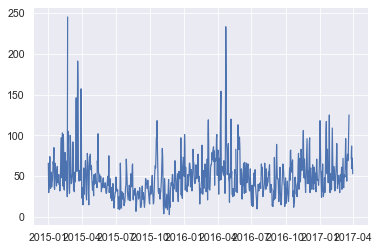

In [11]:
dc = ds.copy()
print(dc.isna().sum())
dc.loc[:,'pm10'] = mih.median_filter(dc, varname='pm10', std=4)
print(dc.isna().sum())
plt.plot(dc['pm10'])

,item_id,date,p10,p25,p50,p75,p90
0,占쏙옙占쏙옙,2017-01-01T00:00:00Z,18.0,29.0,41.0,54.0,75.0
1,占쏙옙占쏙옙,2017-01-02T00:00:00Z,26.0,32.0,43.0,58.0,74.0
2,占쏙옙占쏙옙,2017-01-03T00:00:00Z,24.0,32.0,47.0,58.0,70.0
3,占쏙옙占쏙옙,2017-01-04T00:00:00Z,19.0,35.0,44.0,61.0,70.0
4,占쏙옙占쏙옙,2017-01-05T00:00:00Z,25.0,33.0,44.0,62.0,88.0


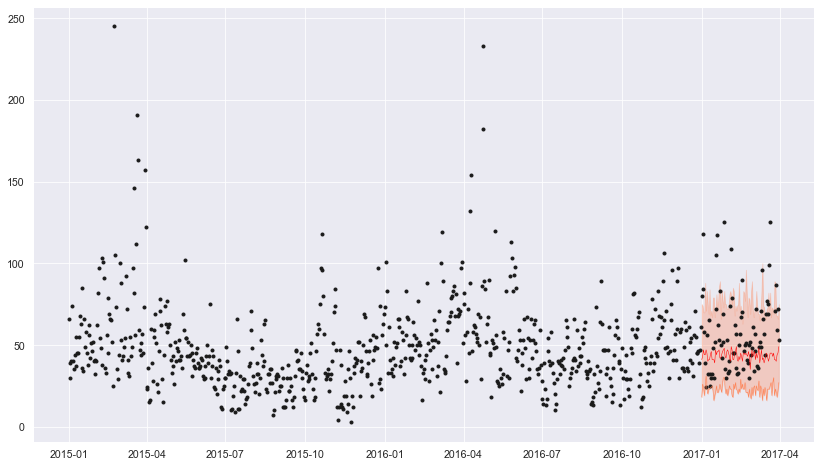

In [23]:
# read in the result from amazon forecast
# amaforesname = 'upto2016_1mo_ahead_2019-12-31T06-08-07Z_part0.csv'
# amaforesname = 'upto2016_3mo_ahead_2020-01-02T05-31-56Z_part0.csv'
amaforesname = 'three_mo_ahead_several_2020-01-02T07-00-06Z_part0.csv'

ar = pd.read_csv(f'{raw}/ama_fore_res/{amaforesname}', encoding='cp949')
display(ar.head())
ar['dt'] = pd.to_datetime(ar['date']).dt.date
ar.set_index('dt', inplace=True)
# ar = ar[['p10','p50','p90']]
ar.head()

f, ax = plt.subplots(figsize=(14, 8))
ax.plot(dc.index, dc.pm10, 'ko', markersize=3)
ax.plot(ar.index, ar.p10, color='coral', lw=0.5)
ax.plot(ar.index, ar.p50, color='red', lw=0.5)
ax.fill_between(ar.index, ar.p10, ar.p90, color='coral', alpha=0.3)

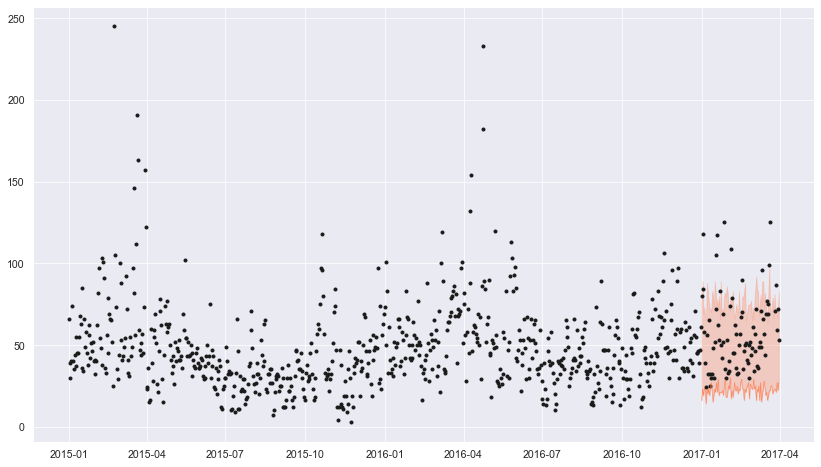

In [13]:
f, ax = plt.subplots(figsize=(14, 8))
# train = verif.loc[:str(year - 1),:]
ax.plot(dc.index, dc.pm10, 'ko', markersize=3)
# ax.plot(train.index, train.yhat, color='steelblue', lw=0.5)
# ax.fill_between(train.index, train.yhat_lower, train.yhat_upper, color='steelblue', alpha=0.3)
# test = verif.loc[str(year):,:]
ax.plot(ar.index, ar.p10, color='coral', lw=0.5)
ax.fill_between(ar.index, ar.p10, ar.p90, color='coral', alpha=0.3)

# ax.plot(test.index, test.y, 'ro', markersize=3)
# ax.plot(test.index, test.yhat, color='coral', lw=0.5)
# ax.fill_between(test.index, test.yhat_lower, test.yhat_upper, color='coral', alpha=0.3)

In [ ]:
f = mih.plot_verif(verif, year=2017)